<h2>1. Perkenalan</h2>
<hr>

<h2>Final Projek 2</h2>
<hr>

Authors dan Creators:

1. Sultan Chisson Obie

<h2>Instruksi</h2>
<hr>

Isi notebook harus mengikuti <b>outline</b> seperti di bawah:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Keputusan

<h2>Projek Rubrik</h2>
<hr>

1. Mengimplementasikan model klasifikasi machine learning dengan Sklearn (Logistic Regression)
2. Mengimplementasikan dan menganalisa confusion matrix
3. Menganalisa data setidaknya dengan 2 tipe grafik (Visualisasi)
4. Preprocessing data sebelum melakukan pengolahan lebih lanjut
5. Tanpa error
6. Tertata dengan baik (markdown) setiap kode
7. Analisis algoritma yang digunakan

<h2>Dataset (Rain in Australia)</h2>
<hr>

Dataset yang dipakai bernama <b>Rain in Australia</b> yang diperoleh dari https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. Dataset ini berisi tentang informasi pengamatan cuaca harian dari banyak lokasi di seluruh Australia selama sekitar 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom. 

<h4>Deskripsi Atribut</h4>

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi


<h3>Objektif yang ingin dicapai</h3>
<hr>

1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

<h2>2. Import libraries</h2>
<hr>

In [1]:
# data Manipulasi dan Analisis
import pandas as pd
import numpy as np

# visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# machine Learning dan Pemodelan
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

# lainnya
import warnings
warnings.filterwarnings("ignore")

<h2>3. Data Loading</h2>
<hr>

In [2]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' - ']

# read dataset
df = pd.read_csv('./dataset/weatherAUS.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# menampilkan dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# melihat dimensi dataset
df.shape

(145460, 23)

In [4]:
# melihat attribut yang ada pada dataset
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [5]:
# melihat atribut yang bertipe numerik (float, int, ...)
df.select_dtypes(include=['float64','int64']).columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

In [6]:
# melihat atribut yang bertipe kategorikal (object)
df.select_dtypes(include=['object']).columns.values

array(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'], dtype=object)

In [7]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<h2>4. Data Cleaning</h2>
<hr>

In [8]:
# menampilkan apakah di setiap attribute ada missing value dengan tampilan boolean (true/false)
df.isna().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [9]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
# kita hapus data yang mempunyai missing value hampir dari 50% data dari dataset
df = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

In [11]:
# drop date karena timestamp tidak penting pada penelitian ini
df = df.drop(columns = 'Date')

In [12]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
# mengisi missing value dengan nilai median untuk kolom attribut numerik
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for column in numeric_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [14]:
# mengisi missing value dengan nilai modus untuk kolom attribut kategorikal
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for column in categorical_columns:
    mode_value = df[column].mode().values[0]
    df[column].fillna(mode_value, inplace=True)

In [15]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

In [17]:
# melihat apakah ada data duplikat pada dataset
df.duplicated().sum()

288

In [18]:
# menghapus data duplikat dari dataset
df = df.drop_duplicates()

In [19]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145172 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145172 non-null  object 
 1   MinTemp        145172 non-null  float64
 2   MaxTemp        145172 non-null  float64
 3   Rainfall       145172 non-null  float64
 4   WindGustDir    145172 non-null  object 
 5   WindGustSpeed  145172 non-null  float64
 6   WindDir9am     145172 non-null  object 
 7   WindDir3pm     145172 non-null  object 
 8   WindSpeed9am   145172 non-null  float64
 9   WindSpeed3pm   145172 non-null  float64
 10  Humidity9am    145172 non-null  float64
 11  Humidity3pm    145172 non-null  float64
 12  Pressure9am    145172 non-null  float64
 13  Pressure3pm    145172 non-null  float64
 14  Temp9am        145172 non-null  float64
 15  Temp3pm        145172 non-null  float64
 16  RainToday      145172 non-null  object 
 17  RainTomorrow   145172 non-nul

In [20]:
# menampilkan dataset
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


<h2>5. Explorasi Data</h2>
<hr>

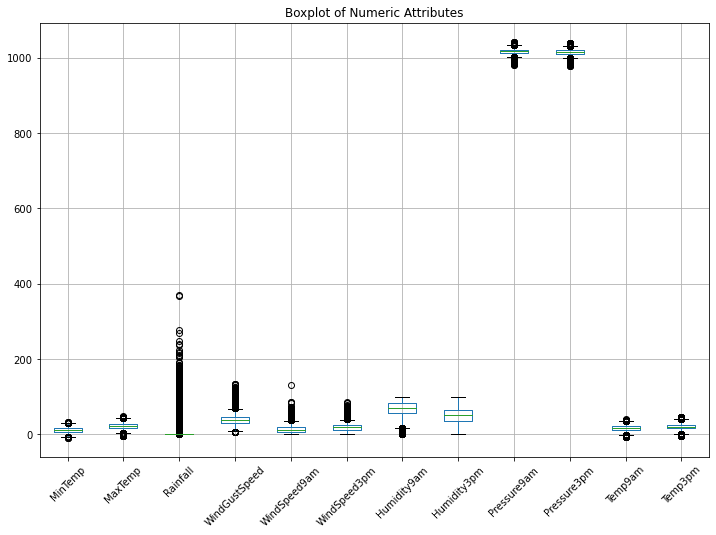

In [21]:
# menampilkan boxplot untuk melihat outlier pada kolom atribut numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

In [22]:
# handling outlier dengan mengganti nilai outlier dengan nilai yang masuk akal

# loop melalui setiap kolom numerik
for column in numeric_columns:
    # menghitung z-score untuk kolom saat ini
    z_scores = np.abs(stats.zscore(df[column]))

    # menentukan threshold z-score untuk outlier (misalnya, jika z-score > 3)
    threshold = 3

    # mengidentifikasi baris yang merupakan outlier berdasarkan z-score
    outliers = df[z_scores > threshold]

    # menggantikan outlier dengan nilai yang masuk akal
    replacement_value = df[column].median()  # Menggunakan median sebagai nilai pengganti
    df.loc[z_scores > threshold, column] = replacement_value

# menampilkan bentuk (shape) dataset setelah menggantikan outlier
print("Bentuk Shape: ", df.shape)

Bentuk Shape:  (145172, 18)


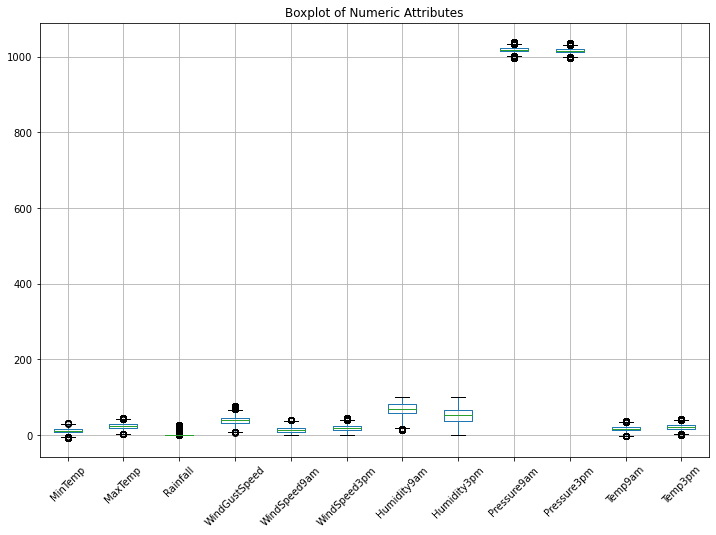

In [23]:
# menampilkan boxplot untuk melihat outlier pada kolom atribut numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

In [24]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145172 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145172 non-null  object 
 1   MinTemp        145172 non-null  float64
 2   MaxTemp        145172 non-null  float64
 3   Rainfall       145172 non-null  float64
 4   WindGustDir    145172 non-null  object 
 5   WindGustSpeed  145172 non-null  float64
 6   WindDir9am     145172 non-null  object 
 7   WindDir3pm     145172 non-null  object 
 8   WindSpeed9am   145172 non-null  float64
 9   WindSpeed3pm   145172 non-null  float64
 10  Humidity9am    145172 non-null  float64
 11  Humidity3pm    145172 non-null  float64
 12  Pressure9am    145172 non-null  float64
 13  Pressure3pm    145172 non-null  float64
 14  Temp9am        145172 non-null  float64
 15  Temp3pm        145172 non-null  float64
 16  RainToday      145172 non-null  object 
 17  RainTomorrow   145172 non-nul

<AxesSubplot:>

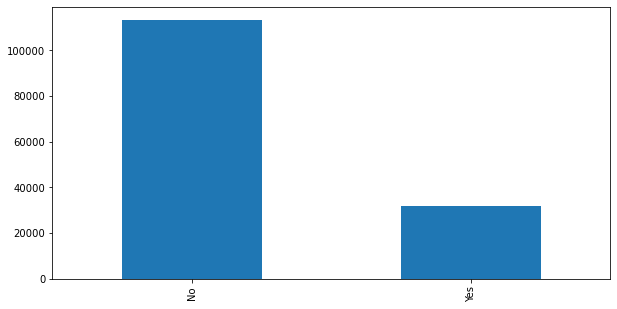

In [25]:
# menghitung value pada kolom attribut RainToday
df['RainToday'].value_counts().plot(kind='bar', figsize=(10,5))

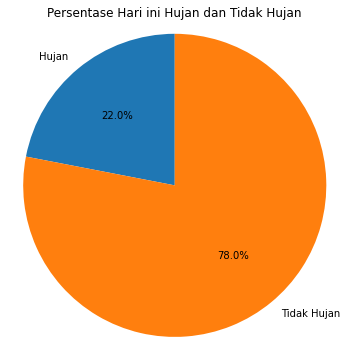

In [26]:
# menghitung jumlah hari hujan dan tidak hujan
rainy_days = df[df['RainToday'] == 'Yes'].shape[0]
non_rainy_days = df[df['RainToday'] == 'No'].shape[0]

# membuat labels dan sizes untuk pie chart
labels = ['Hujan', 'Tidak Hujan']
sizes = [rainy_days, non_rainy_days]

# membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Hari ini Hujan dan Tidak Hujan')
plt.axis('equal')
plt.show()

<AxesSubplot:>

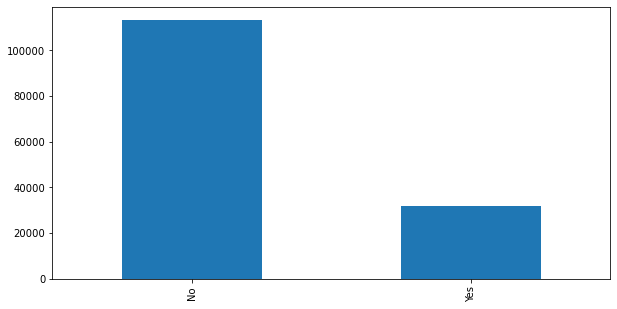

In [27]:
# menghitung value pada kolom attribut RainTomorrow
df['RainTomorrow'].value_counts().plot(kind='bar', figsize=(10,5))

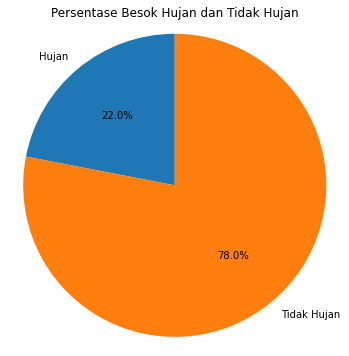

In [28]:
# menghitung jumlah hari hujan dan tidak hujan
rainy_days_tomorrow = df[df['RainTomorrow'] == 'Yes'].shape[0]
non_rainy_days_tomorrow = df[df['RainToday'] == 'No'].shape[0]

# membuat labels dan sizes untuk pie chart
labels = ['Hujan', 'Tidak Hujan']
sizes = [rainy_days_tomorrow, non_rainy_days_tomorrow]

# membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Besok Hujan dan Tidak Hujan')
plt.axis('equal')
plt.show()

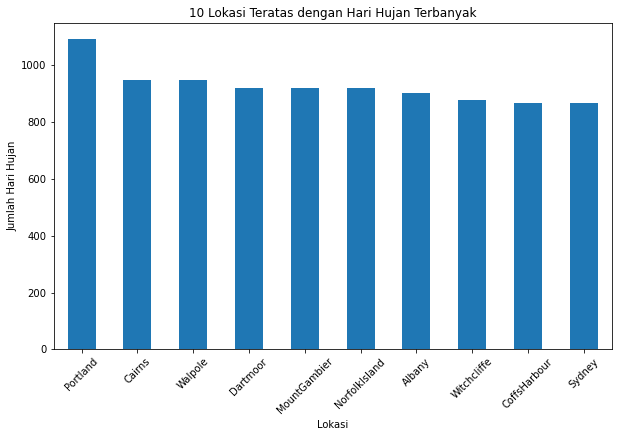

In [29]:
# menghitung jumlah hari hujan berdasarkan lokasi
rainy_days = df[df['RainToday'] == 'Yes']['Location'].value_counts()

# mengurutkan berdasarkan jumlah hari hujan
rainy_days = rainy_days.sort_values(ascending=False)

# mengambil 10 lokasi dengan jumlah hari hujan tertinggi
top_10_locations = rainy_days.head(10)

# membuat bar chart
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('10 Lokasi Teratas dengan Hari Hujan Terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Hari Hujan')
plt.xticks(rotation=45)
plt.show()

<h2>6. Data Preprocessing</h2>
<hr>

In [30]:
# menampilkan statistik deskriptif dari kolom-kolom numerik pada dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000,145172.000000
mean,12.194292,23.247359,1.450105,39.393147,13.722722,18.460750,69.144718,51.552510,1017.729895,1015.310985,16.997781,21.691990
std,6.366629,7.007170,3.853125,12.036892,8.283833,8.317301,18.485254,20.491632,6.516741,6.485821,6.418754,6.744852
min,-6.900000,2.000000,0.000000,6.000000,0.000000,0.000000,13.000000,0.000000,997.500000,995.300000,-2.300000,1.100000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.100000,12.400000,16.800000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.400000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000
max,31.200000,44.500000,27.400000,78.000000,39.000000,44.000000,100.000000,100.000000,1037.800000,1035.200000,36.300000,42.200000


In [31]:
# menampilkan statistik deskriptif dari kolom-kolom objek pada dataset
df.describe(include = 'object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145172,145172,145172,145172,145172,145172
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,19953,22036,14778,113292,113300


In [32]:
# menghitung nilai unik pada Location
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Hobart              3193
Perth               3193
Brisbane            3193
Adelaide            3193
GoldCoast           3040
Wollongong          3040
Cairns              3040
Townsville          3040
Bendigo             3040
MountGambier        3040
Albany              3040
AliceSprings        3040
Ballarat            3040
Launceston          3039
Tuggeranong         3039
Albury              3038
Penrith             3033
MountGinini         3025
Sale                3009
SydneyAirport       3009
Moree               3009
PerthAirport        3009
Witchcliffe         3009
Woomera             3009
Nuriootpa           3009
MelbourneAirport    3009
NorfolkIsland       3009
WaggaWagga          3009
Williamtown         3009
Watsonia            3009
Portland            3009
Mildura             3009
Cobar               3008
PearceRAAF          3007
Richmond            3006
CoffsHarbour        3001


In [33]:
# menghitung nilai unik pada kolom WindDir3pm
df.WindDir3pm.value_counts()

SE     14778
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [34]:
# menghitung nilai unik pada kolom RainToday
df.RainToday.value_counts()

No     113292
Yes     31880
Name: RainToday, dtype: int64

In [35]:
# menghitung nilai unik pada kolom RainTomorrow
df.RainTomorrow.value_counts()

No     113300
Yes     31872
Name: RainTomorrow, dtype: int64

In [36]:
# mengubah nilai kolom kategorikal pada RainToday dan RainTomorrow menjadi nilai biner
df['RainToday'] = np.where(df['RainToday'] == 'Yes', 1, 0)
df['RainTomorrow'] = np.where(df['RainTomorrow'] == 'Yes', 1, 0)

In [37]:
# melakukan operasi one hot encoding meribah variabel kategorikal ke numerik
df = pd.get_dummies(df)

# menampilkan 5 data teratas dari dataset yang sudah dilakukan operasi one hot encoding
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [38]:
# buat variabel x berisi semua kolom-kolom yang ada kecuali kolom RainTomorrow
X = df.drop(columns = 'RainTomorrow')

# buat variabel y berisi kolom RainTomorrow
y = df['RainTomorrow']

In [39]:
# membuat data latih dan data uji dengan indikasi 30% ke data uji 70% ke data latih 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [40]:
# penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# seleksi fitur
selector = SelectKBest(score_func=f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

<h2>7. Pendefinisian Model</h2>
<hr>

In [42]:
# membuat objek model regresi linear dengan library scikit-learn
logreg = LogisticRegression()
svm = SVC()

<h2>Logistic Regression dan Support Vector Machine</h2>

<b>Logistic regression</b> adalah jenis analisis statistik yang sering digunakan data analyst untuk pemodelan prediktif. Dalam pendekatan analitik ini, variabel dependennya terbatas atau kategoris, bisa berupa A atau B (regresi biner) atau berbagai opsi hingga A, B, C atau D (regresi multinomial). Jenis analisis statistik digunakan dalam software statistik untuk memahami hubungan antara variabel dependen dan satu atau lebih variabel independen dengan memperkirakan probabilitas.

<b>Support Vector Machine</b> (SVM) adalah salah satu algoritma machine learning dengan pendekatan supervised learning yang bekerja dengan mencari hyperplane atau fungsi pemisah terbaik untuk memisahkan kelas. Algoritma SVM memiliki konsep dan dasar matematis yang mapan sehingga menjadi algoritma yang populer. Algoritma ini dapat digunakan untuk klasifikasi (SVM classification) dan regresi (SVM regression).

<h2>Alasan Memilih Logistic Regression dan Support Vector Machine</h2>

Dalam pendefinisian model kami menggunakan model LogisticRegression dan SVM untuk memprediksi RainTomorrow. Alasan mengapa kami memilih 2 model tersebut:

1. Logistic Regression
    - Mudah untuk diinterpretasikan. Model ini menghasilkan probabilitas kelas yang dapat diartikan sebagai kepercayaan model terhadap kelas target.
    - Cukup efisien dan memiliki waktu komputasi yang cepat, terutama pada dataset yang relatif besar.
    
2. Support Vector Machine
    - Dapat bekerja dengan baik pada dataset yang memiliki dimensi tinggi dan jumlah fitur yang besar.
    - SVM juga memiliki dukungan untuk menangani data yang tidak seimbang (imbalanced data) dengan memberikan bobot pada setiap sampel dalam proses pembelajaran.

<h2>8. Pelatihan Model</h2>
<hr>

In [43]:
# melatih model logistic regression
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
# melatih model SVM
svm.fit(X_train, y_train)

SVC()

<h2>9. Evaluasi Model</h2>
<hr>

In [45]:
# memprediksi data uji logistic regression
y_pred_log = logreg.predict(X_test)

# evaluasi performa model
report = classification_report(y_test, y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34142
           1       0.70      0.44      0.54      9410

    accuracy                           0.84     43552
   macro avg       0.78      0.70      0.72     43552
weighted avg       0.83      0.84      0.82     43552



In [46]:
# memprediksi data uji SVM
y_pred_svm = svm.predict(X_test)

# evaluasi performa model
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     34142
           1       0.75      0.42      0.54      9410

    accuracy                           0.84     43552
   macro avg       0.81      0.69      0.72     43552
weighted avg       0.83      0.84      0.83     43552



<h2>10. Model Inference</h2>
<hr>

In [47]:
# membuat salinan dari dataset yang ada dan menyimpan di variabel baru X_to_test
X_to_test = df.copy()

In [48]:
# menghitung jumlah missing value pada dataset X_to_test
X_to_test.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
WindSpeed9am      0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 111, dtype: int64

In [49]:
# menampilkan 10 data teratas pada dataset X_to_test
X_to_test.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,9.7,31.9,0.0,39.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
# memilih fitur tertentu untuk data latih
selected_features = ['RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am']  # memilih 10 fitur

# Filter the columns of X_to_test to include only the selected feature filter kolom X_to_test untuk memasukkan hanya fitur pilihan
X_to_test_filtered = X_to_test[selected_features]

In [51]:
# menampilkan 10 data teratas pada dataset X_to_test
X_to_test_filtered.head(10)

,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am
0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9
1,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2
2,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0
3,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1
4,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8
5,0,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6
6,0,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1
7,0,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3
8,1,9.7,31.9,0.0,39.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3
9,0,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1


In [52]:
# dictionary berisi value attribut yang akan digunakan untuk inferensi atau prediksi
to_inference = {'MinTemp' : [17.1],
                'MaxTemp' : [34.4],
                'WindGustSpeed' : [50],
                'WindSpeed9am' : [17],
                'WindSpeed3pm' : [24],
                'Humidity9am' : [70],
                'Humidity3pm' : [30],
                'Pressure9am' : [1001.0],
                'Pressure3pm' : [1000.5],
                'Temp9am' : [20]}

In [53]:
# membuat Dataset dari dicionary to_inference
pd.DataFrame(to_inference)

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am
0,17.1,34.4,50,17,24,70,30,1001.0,1000.5,20


In [54]:
# menggabungkan dataset X_to_test dengan dataset dictionary to_inference
X_to_test_filtered = pd.concat([X_to_test_filtered, pd.DataFrame(to_inference)], ignore_index = True)

In [55]:
# menampilkan dataset X_to_test
X_to_test_filtered

,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am
0,0.0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9
1,0.0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2
2,0.0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0
3,0.0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1
4,0.0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...
145168,0.0,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9
145169,0.0,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5
145170,0.0,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1
145171,0.0,14.9,22.6,0.0,39.0,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0


In [56]:
# menereapkan one hot encoding variabel kategorikal ke numerik pada dataset X_to_test
X_to_test_filtered = pd.get_dummies(X_to_test_filtered)

# memilih dua baris terakhir dari dataset X_to_test
X_to_test_filtered = X_to_test_filtered[-1:]

# menampilkan dataset X_to_test
X_to_test_filtered

,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am
145172,NaN,17.1,34.4,NaN,50.0,17.0,24.0,70.0,30.0,1001.0,1000.5,20.0


In [57]:
# drop kolom price pada dataset X_to_test
X_to_test_filtered = X_to_test_filtered.drop(columns = 'RainTomorrow')

In [58]:
# menampilkan dataset X_to_test
X_to_test_filtered

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am
145172,17.1,34.4,NaN,50.0,17.0,24.0,70.0,30.0,1001.0,1000.5,20.0


In [59]:
# memprediksi nilai price menggunakan model logistic regression yang telah dilatih sebelumnya
RainTomorrowLoReg = y_pred_log

In [60]:
# memprediksi nilai price menggunakan model SVM yang telah dilatih sebelumnya
RainTomorrowSVM = y_pred_svm

In [61]:
# menampilkan hasil inference atau prediksi RainTomorrow dengan logistic regression
np.set_printoptions(threshold=np.inf)
print(RainTomorrowLoReg)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 

In [62]:
# menghitung total No dan Yes dari hasil inference atau prediksi logistic regression
total_zeros = np.count_nonzero(RainTomorrowLoReg == 0)
total_ones = np.count_nonzero(RainTomorrowLoReg == 1)

print("Total No:", total_zeros)
print("Total Yes:", total_ones)

Total No: 37559
Total Yes: 5993


In [63]:
# menampilkan hasil inference atau prediksi RainTomorrow dengan SVM
np.set_printoptions(threshold=np.inf)
print(RainTomorrowSVM)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
# menghitung total No dan Yes dari hasil inference atau prediksi SVM
total_zeros = np.count_nonzero(RainTomorrowSVM == 0)
total_ones = np.count_nonzero(RainTomorrowSVM == 1)

print("Total No:", total_zeros)
print("Total Yes:", total_ones)

Total No: 38350
Total Yes: 5202


<h2>11. Kesimpulan</h2>
<hr>

1. Dataset ini terdiri dari 145.460 baris dan 23 kolom. Dataset ini berisi tentang informasi pengamatan cuaca harian dari banyak lokasi di seluruh Australia selama sekitar 10 tahun.
2. Berdasarkan grafik bar, diketahui bahwa perbandingan hujan hari ini di Australia didominasi dengan situasi tidak hujan.
3. Berdasarkan grafik lingkaran, diketahui bahwa persentase wilayah yang tidak mengalami hujan pada hari ini lebih besar daripada yang mengalami hujan (78%).
4. Berdasarkan grafik bar, diketahui bahwa wilayah Portland merupakan lokasi dengan jumlah hari hujan terbanyak (>1000).
5. Berdasarkan tingkat akurasi, logistic regression dan SVM menunjukkan nilai akurasi yang sama, yaitu sebesar 0,84.
6. Model berhasil digunakan untuk memprediksi RainTomorrow dengan value inference yang dipakai:
                'MinTemp' : [17.1],
                'MaxTemp' : [34.4],
                'WindGustSpeed' : [50],
                'WindSpeed9am' : [17],
                'WindSpeed3pm' : [24],
                'Humidity9am' : [70],
                'Humidity3pm' : [30],
                'Pressure9am' : [1001.0],
                'Pressure3pm' : [1000.5],
                'Temp9am' : [20]
    dengan menggunakan model logistic regression diperoleh hasil inference atau prediksi No = 37559 dan Yes = 5993 yang berarti adalah prediksi apakah besok akan hujan? adalah tidak, dan begitupun dengan hasil inference atau prediksi dengan menggunakan SVM No = 38350 dan Yes = 5202 yang berarti prediksi apakah bahwa besok hujan? adalah tidak. 